In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df=pd.read_csv('train.csv' ,usecols=['Age','Fare','Survived'])

In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(714, 3)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [9]:
dc=DecisionTreeClassifier()


In [10]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred=dc.predict(X_test)

In [13]:
accuracy_score(y_test,y_pred)

0.6153846153846154

In [14]:

clf=DecisionTreeClassifier()
np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy'))

0.6275234741784037

In [45]:
Kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')


In [46]:
trf = ColumnTransformer([
    ('First',Kbin_age,[0]),
    ('Second',Kbin_fare,[1])

])

In [47]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [48]:
trf.named_transformers_

{'First': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'Second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [49]:
trf.named_transformers_['First'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [50]:
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1],
})

In [51]:
#continuous to discrete

output['age_labels']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['First'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['Second'].bin_edges_[0].tolist())

In [52]:

output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
857,51.0,13.0,26.5500,10.0,"(47.0, 54.0]","(26.0, 26.55]"
203,45.5,12.0,7.2250,0.0,"(42.0, 47.0]","(0.0, 7.25]"
124,54.0,14.0,77.2875,13.0,"(47.0, 54.0]","(76.292, 108.9]"
862,48.0,13.0,25.9292,8.0,"(47.0, 54.0]","(18.75, 26.0]"
536,45.0,12.0,26.5500,10.0,"(42.0, 47.0]","(26.0, 26.55]"


In [53]:
clf1=DecisionTreeClassifier()
clf1.fit(X_train_trf,y_train)

DecisionTreeClassifier()

In [54]:
y_pred2=clf1.predict(X_test_trf)
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [55]:
X_trf = trf.fit_transform(X)

np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6723004694835681

In [64]:
def values(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")
    plt.show()



0.6585093896713615


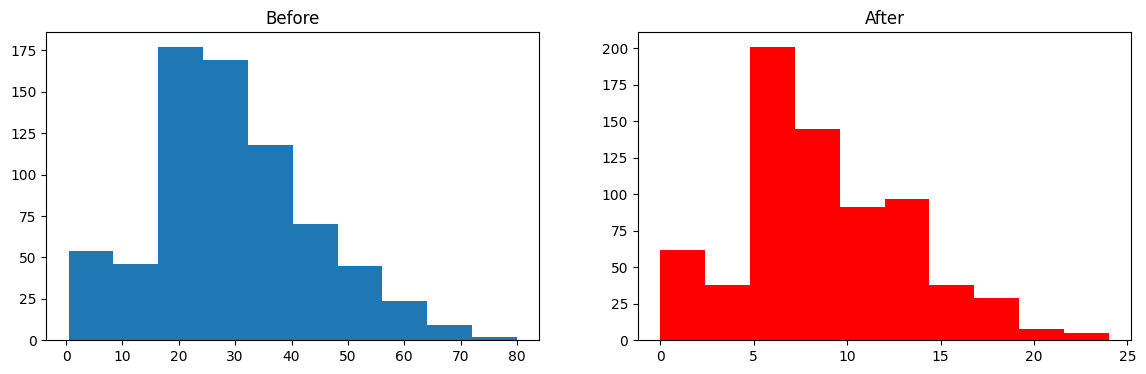

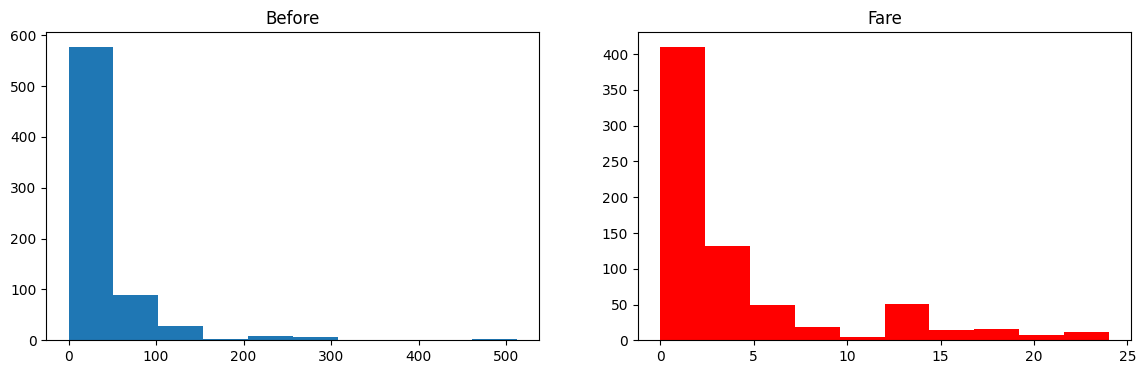

In [65]:
values(25,'kmeans')